# **Detection and Classification of Distributed denial-of-service Attacks**

The resources which were used while implementing the project are mentioned below.

We have implemented the conference paper. We have changed the pre-processing steps and we achieved better accuracy results(Xgboost- 97.2%, SGD- 90.02%, KNN-95.8%, Naive bayes- 86.1%) than what were mentioned in the paper(Xgboost- 89.3%, SGD- 76.7%, KNN-87%, Naive bayes- 78.3%). We have used 4 different algorithms while implementing the project which are XGBoost, K-nearest neighbors, stochastic gradient descent and Naive Bayes. Among the 4 the highest accuracy is oberved in XGBoost which is 97.2% and  least accuracy is observed in Naive-Bayes is 86.1%
For preprocessing the methods we followed from assignment MLforSmartMonkeys given by professor.
The conference paper is cited below:
Usha, G., Narang, M., Kumar, A. (2021). Detection and Classification of Distributed DoS Attacks Using Machine Learning. In: Smys, S., Palanisamy, R., Rocha, Á., Beligiannis, G.N. (eds) Computer Networks and Inventive Communication Technologies. Lecture Notes on Data Engineering and Communications Technologies, vol 58. Springer, Singapore. https://doi.org/10.1007/978-981-15-9647-6_78

Citations of the IEEE papers
1.\
I. Sharafaldin, A. H. Lashkari, S. Hakak and A. A. Ghorbani, "Developing Realistic Distributed Denial of Service (DDoS) Attack Dataset and Taxonomy," 2019 International Carnahan Conference on Security Technology (ICCST), Chennai, India, 2019, pp. 1-8, doi: 10.1109/CCST.2019.8888419. keywords: {Computer crime;Taxonomy;IP networks;Protocols;Cloud computing;Feature extraction;Tools;DDoS;IDS;DDoS Dataset;DDoS taxonomy;Network Traffic},

2.\
A. Ahmim, F. Maazouzi, M. Ahmim, S. Namane and I. B. Dhaou, "Distributed Denial of Service Attack Detection for the Internet of Things Using Hybrid Deep Learning Model," in IEEE Access, vol. 11, pp. 119862-119875, 2023, doi: 10.1109/ACCESS.2023.3327620.
keywords: {Denial-of-service attack;Deep learning;Computer crime;Machine learning algorithms;Intrusion detection;Computer hacking;Classification algorithms;Machine learning;Convolutional neural networks;Intrusion detection;DDoS detection;IDS;machine learning;deep learning;CNN;LSTM;autoencoder;hybrid model},

3.\
S. Santhosh, M. Sambath and J. Thangakumar, "Detection Of DDOS Attack using Machine Learning Models," 2023 International Conference on Networking and Communications (ICNWC), Chennai, India, 2023, pp. 1-6, doi: 10.1109/ICNWC57852.2023.10127537. keywords: {Machine learning algorithms;Systematics;Forestry;Predictive models;Denial-of-service attack;Prediction algorithms;Classification algorithms;Cyber Attack;Attack Detection Mechanisms;DDOS Attacks;Machine Learning;Random Forest Algorithm;XGboost Algorithm},


The websites which are gone through for studying the DDoS attack is shown.

https://www.cloudflare.com/learning/ddos/what-is-a-ddos-attack/

Also the chagpt links are given below. \
https://chat.openai.com/c/36aa29ae-5bc6-471e-b455-5b0ec1e1d2d5 \
https://chat.openai.com/c/827045dc-470d-4670-b30b-78453bf6b41e

For extracting the dataset the following links are used \
https://www.kaggle.com/datasets/rodrigorosasilva/cic-ddos2019-30gb-full-dataset-csv-files?resource=download-directory \
https://www.unb.ca/cic/datasets/ddos-2019.html

https://github.com/mohak1/Detection-and-Classification-of-Distributed-DoS-Attacks-using-Machine-Learning


In [ ]:

#Importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix #For plotting scatter plot
from sklearn import preprocessing # For data preprocessing
from sklearn.model_selection import train_test_split #For splitting training and testing data

In [ ]:
#Importing the data from google drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/03-11'


Mounted at /content/drive


In [ ]:
cd ./drive/My\ Drive

/content/drive/My Drive


In [ ]:
cd ./03-11

/content/drive/My Drive/03-11


In [ ]:
%ls

After_correlation.csv  LDAP.csv     normalised_data.csv  target.csv
clean_2.csv            MSSQL.csv    Portmap.csv          UDP.csv
complete_dataset.csv   NetBIOS.csv  Syn.csv              UDPLag.csv


In [ ]:
ldap = pd.read_csv('./LDAP.csv', nrows = 200000)#Reading LDAP data file

<ipython-input-7-54e557d76eeb>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  ldap = pd.read_csv('./LDAP.csv', nrows = 200000)#Reading LDAP data file


In [ ]:
mssql = pd.read_csv('./MSSQL.csv',nrows = 200000)#Reading MSSQL data file


<ipython-input-8-38385e6b58fd>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  mssql = pd.read_csv('./MSSQL.csv',nrows = 200000)#Reading MSSQL data file


In [ ]:
netbios = pd.read_csv('./NetBIOS.csv',nrows = 200000)#Reading NetBIOS data file


In [ ]:
portmap = pd.read_csv('./Portmap.csv', nrows= 200000)#Reading Portmap data file


<ipython-input-10-ebecccc402b3>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  portmap = pd.read_csv('./Portmap.csv', nrows= 200000)#Reading Portmap data file


In [ ]:
syn = pd.read_csv('./Syn.csv', nrows= 200000)#Reading Syn data file


<ipython-input-11-6e0081e0c054>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  syn = pd.read_csv('./Syn.csv', nrows= 200000)#Reading Syn data file


In [ ]:
udp = pd.read_csv('./UDP.csv', nrows= 200000)#Reading UDP data file


<ipython-input-12-6d0719b6285a>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  udp = pd.read_csv('./UDP.csv', nrows= 200000)#Reading UDP data file


In [ ]:
udplag = pd.read_csv('./UDPLag.csv', nrows= 200000)#Reading UDPLag data file

<ipython-input-13-f85968926bb5>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  udplag = pd.read_csv('./UDPLag.csv', nrows= 200000)#Reading UDPLag data file


In [ ]:
ldap.describe()#To see the differenet parameters of the features

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000
mean,107079.731440,785.628145,32899.502005,16.989295,3.233449e+04,2.019230,0.012085,461.194640,3.384760,228.809665,...,-8.693016e+06,1.492380e+02,4.837424e+01,2.215202e+02,1.095734e+02,1.563084e+04,7.810375e+02,1.630462e+04,1.497482e+04,0.999125
std,61077.202258,1425.626916,18949.818414,0.345212,1.656049e+06,1.393169,1.301963,437.964817,678.975868,20.833934,...,9.572219e+07,2.180590e+04,7.191224e+03,2.812638e+04,1.952135e+04,8.330314e+05,9.681007e+04,8.667421e+05,8.084877e+05,0.029568
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,54200.750000,648.000000,16494.750000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,107035.500000,715.000000,32993.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000,229.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,160010.250000,869.000000,49363.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000,229.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,212833.000000,63648.000000,65535.000000,17.000000,1.197270e+08,260.000000,345.000000,150934.000000,253332.000000,3493.000000,...,2.650000e+02,5.420433e+06,1.413901e+06,6.504250e+06,5.028370e+06,7.586796e+07,2.431802e+07,7.586796e+07,7.586796e+07,1.000000


In [ ]:
#checking for Null entries in LDAP data set
for col in ldap.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(ldap[col])))+ ' null entries')


Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 5 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

There are no null entries in ldap data
LDAP.csv  MSSQL.csv  NetBIOS.csv  Portmap.csv  Syn.csv  UDP.csv  UDPLag.csv

In [ ]:
#checking for Null entries in MSSQL data set
for col in mssql.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(mssql[col])))+ ' null entries')

Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 0 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

In [ ]:
#checking for Null entries in Syn data set
for col in syn.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(syn[col])))+ ' null entries')

Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 3 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

In [ ]:
#checking for  Null entries in NetBIOS data set
for col in netbios.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(netbios[col])))+ ' null entries')

Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 1 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

In [ ]:
#checking for Null entries in Portmap data set
for col in portmap.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(portmap[col])))+ ' null entries')

Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 1 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

In [ ]:
#Checking for Null entries in UDP data set
for col in udp.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(udp[col])))+ ' null entries')

Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 1 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

In [ ]:
# checking for Null entries in UDPLag data set
for col in udplag.columns.values: #For every column
  print(col + ' has ' + str(np.sum(pd.isnull(udplag[col])))+ ' null entries')

Unnamed: 0 has 0 null entries
Flow ID has 0 null entries
 Source IP has 0 null entries
 Source Port has 0 null entries
 Destination IP has 0 null entries
 Destination Port has 0 null entries
 Protocol has 0 null entries
 Timestamp has 0 null entries
 Flow Duration has 0 null entries
 Total Fwd Packets has 0 null entries
 Total Backward Packets has 0 null entries
Total Length of Fwd Packets has 0 null entries
 Total Length of Bwd Packets has 0 null entries
 Fwd Packet Length Max has 0 null entries
 Fwd Packet Length Min has 0 null entries
 Fwd Packet Length Mean has 0 null entries
 Fwd Packet Length Std has 0 null entries
Bwd Packet Length Max has 0 null entries
 Bwd Packet Length Min has 0 null entries
 Bwd Packet Length Mean has 0 null entries
 Bwd Packet Length Std has 0 null entries
Flow Bytes/s has 2 null entries
 Flow Packets/s has 0 null entries
 Flow IAT Mean has 0 null entries
 Flow IAT Std has 0 null entries
 Flow IAT Max has 0 null entries
 Flow IAT Min has 0 null entries
Fwd

In [ ]:
#Adding all the data into the same file
full_dataset = pd.concat([ldap, mssql, netbios, portmap, syn, udp, udplag])
print('Size of whole data set is:\n',full_dataset.shape)

Size of whole data set is:
 (1391694, 88)


In [ ]:
#To display the parameters of the features in the whole dataset which is concatenated
pd.set_option('display.max_columns', None)
full_dataset.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1391681.0,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1391694.0,1391694.0,1391694.0,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1391694.0,1.391694e+06,1.391694e+06,1391694.0,1.391694e+06,1.391694e+06,1.391694e+06,1391694.0,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1391694.0,1391694.0,1391694.0,1391694.0,1391694.0,1391694.0,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06
mean,1.295754e+05,2.483984e+04,3.272484e+04,1.470650e+01,3.491457e+06,3.026174e+00,4.664423e-01,6.945334e+02,8.454486e+01,2.757823e+02,2.685593e+02,2.714977e+02,3.533980e+00,3.058207e+00,9.072497e-01,1.476627e+00,6.529312e-01,inf,inf,3.374561e+05,5.716534e+05,1.480092e+06,5.885657e+02,3.488921e+06,4.530834e+05,6.370332e+05,1.478741e+06,5.787746e+02,1.229770e+06,2.548764e+05,4.384575e+05,9.150359e+05,3.625581e-01,1.329315e-03,0.0,0.0,0.0,-6.226130e+07,9.660845e+00,1.143141e+06,1.237052e+03,2.685277e+02,2.771690e+02,2.712978e+02,3.761397e+00,4.960104e+02,0.0,6.538794e-05,1.329315e-03,0.0,2.044070e-01,3.881600e-03,1.953016e-03,0.0,5.720223e-02,3.957555e+02,2.714977e+02,1.476627e+00,-6.226130e+07,0.0,0.0,0.0,0.0,0.0,0.0,3.026174e+00,6.945334e+02,4.664423e-01,8.454486e+01,1.231658e+03,2.060675e+01,1.974696e+00,-3.022158e+07,1.105491e+04,1.568401e+04,3.020421e+04,1.760084e+03,1.130232e+06,3.288389e+05,1.463237e+06,8.330158e+05,9.919285e-01
std,1.161638e+05,2.419404e+04,1.901081e+04,4.470170e+00,1.273657e+07,2.914182e+01,2.707726e+01,9.522652e+02,4.971334e+04,2.217170e+02,2.171932e+02,2.179236e+02,1.580121e+01,6.981270e+01,5.871960e+00,2.248003e+01,2.077584e+01,NaN,NaN,1.257293e+06,2.086839e+06,5.386966e+06,1.200249e+05,1.273548e+07,1.618716e+06,2.315171e+06,5.386710e+06,1.200431e+05,7.242638e+06,1.480756e+06,2.569165e+06,5.284128e+06,3.492193e+00,3.643555e-02,0.0,0.0,0.0,3.807255e+08,5.448572e+02,9.477264e+05,1.150395e+04,2.171349e+02,2.285564e+02,2.177274e+02,2.195137e+01,1.482267e+04,0.0,8.086019e-03,3.643555e-02,0.0,4.032678e-01,6.218148e-02,4.414978e-02,0.0,2.492594e-01,3.243722e+02,2.179236e+02,2

In [ ]:
#To remove the features with No variation(standarad deviation = 0)
std = full_dataset.describe()
print('Size of the dataset:', full_dataset.shape)
zero_std_cols = std.columns[std.loc['std'] == 0].tolist()
print('The columns with zero standard deviation are:\n',zero_std_cols)
print('No.of columns with zero standard deviation:',len(zero_std_cols))
data = full_dataset.drop(columns = zero_std_cols)
print('Size of the dataset after removing the columns with zero standard deviation:',data.shape)

Size of the dataset: (1391694, 88)
The columns with zero standard deviation are:
 [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
No.of columns with zero standard deviation: 12
Size of the dataset after removing the columns with zero standard deviation: (1391694, 76)


In [ ]:
#To check the diversity in the features of the data
print('-----------------------------------------------------')
print('The diversity in the features of data is as follows :')
print('------------------------------------------------------')
for col in data.columns.values: #For every column
  list_vals = pd.unique(data[col]) #Creates list of unique values
  print(col + ' is of type' + str(data[col].dtypes) + ', has ' + str(len(list_vals))+ ' unique values, and ' + str(np.sum(pd.isnull(data[col])))+ ' null entries')
  if(len(list_vals)<10): #If column has less than 10 unique values print the values
    list_str = ''
    for i in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[i]) + ','
    print(' These are: '+list_str[0:len(list_str)-2])

-----------------------------------------------------
The diversity in the features of data is as follows :
------------------------------------------------------
Unnamed: 0 is of typeint64, has 403320 unique values, and 0 null entries
Flow ID is of typeobject, has 1300864 unique values, and 0 null entries
 Source IP is of typeobject, has 366 unique values, and 0 null entries
 Source Port is of typeint64, has 60944 unique values, and 0 null entries
 Destination IP is of typeobject, has 433 unique values, and 0 null entries
 Destination Port is of typeint64, has 65534 unique values, and 0 null entries
 Protocol is of typeint64, has 3 unique values, and 0 null entries
 These are: 17,6,
 Timestamp is of typeobject, has 1391625 unique values, and 0 null entries
 Flow Duration is of typeint64, has 142284 unique values, and 0 null entries
 Total Fwd Packets is of typeint64, has 175 unique values, and 0 null entries
 Total Backward Packets is of typeint64, has 200 unique values, and 0 null en

In [ ]:
data = data.rename(columns = {" Label" : "Label"})#Replacing space wit without space in the header label
data['Label'] = data['Label'].replace({'BENIGN':0,'NetBIOS':1,'LDAP':2,'MSSQL':3,'Portmap':4,'Syn':5,'UDP':6,'UDPLag':7})#Classification of data into 8 categories which are given in the label column
data.Label.unique()

array([1, 0, 2, 3, 4, 5, 6, 7])

In [ ]:
#Handling the features ' Source IP' and ' Destination IP'
!pip install netaddr
import netaddr#netaddr to convert Ip format to integer
#Checking with an example
print(int(netaddr.IPAddress('10.107.38.3')))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.8 MB/s eta 0:00:00
174794243


In [ ]:
#Converting an IPV4 data to integer
source_ip = data[' Source IP'].unique()#To find the unique values of Source IP address
data[' Source IP'] = data[' Source IP'].replace({ip: int(netaddr.IPAddress(ip)) for ip in source_ip})

dest_ip = data[' Destination IP'].unique()#To find the unique values of Source IP address
data[' Destination IP'] = data[' Destination IP'].replace({ip: int(netaddr.IPAddress(ip)) for ip in dest_ip})

In [ ]:
#Checking the conversion of the IP Addresses
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,2886729733,870,3232248324,2908,17,2018-11-03 10:09:00.565557,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,0.0,0.0,0.0,0.0,4.220000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,211.0,211.0,211.0,0.0,0.0,0,0,0,0,0,0.0,316.5,211.0,0.0,-2,2,422,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,62631,172.16.0.5-192.168.50.4-871-53796-17,2886729733,871,3232248324,53796,17,2018-11-03 10:09:00.565559,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,0.0,0.0,0.0,0.0,1.104167e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,4.166667e+04,0.0,265.0,265.0,265.0,0.0,0.0,0,0,0,0,0,0.0,397.5,265.0,0.0,-2,2,530,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
2,143869,172.16.0.5-192.168.50.4-648-40660-17,2886729733,648,3232248324,40660,17,2018-11-03 10:09:00.565608,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,16171,172.16.0.5-192.168.50.4-872-54308-17,2886729733,872,3232248324,54308,17,2018-11-03 10:09:00.565993,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,80845,172.16.0.5-192.168.50.4-873-40653-17,2886729733,873,3232248324,40653,17,2018-11-03 10:09:00.565994,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [ ]:
#Handling Timestamp information
#To extract year, month, day, hour, minute information from time stamp data
data[' Timestamp'] = pd.to_datetime(data[' Timestamp'])

data['Year'] = data[' Timestamp'].dt.year
data['Month'] = data[' Timestamp'].dt.month
data['Day'] = data[' Timestamp'].dt.day
data['Hour'] = data[' Timestamp'].dt.hour
data['Minute'] = data[' Timestamp'].dt.minute

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391694 entries, 0 to 199999
Data columns (total 81 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Unnamed: 0                    1391694 non-null  int64         
 1   Flow ID                       1391694 non-null  object        
 2    Source IP                    1391694 non-null  int64         
 3    Source Port                  1391694 non-null  int64         
 4    Destination IP               1391694 non-null  int64         
 5    Destination Port             1391694 non-null  int64         
 6    Protocol                     1391694 non-null  int64         
 7    Timestamp                    1391694 non-null  datetime64[ns]
 8    Flow Duration                1391694 non-null  int64         
 9    Total Fwd Packets            1391694 non-null  int64         
 10   Total Backward Packets       1391694 non-null  int64         
 11  Tota

In [ ]:
#Dropping the FLow ID feature
data = data.drop('Flow ID', axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1391694 entries, 0 to 199999
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Unnamed: 0                    1391694 non-null  int64         
 1    Source IP                    1391694 non-null  int64         
 2    Source Port                  1391694 non-null  int64         
 3    Destination IP               1391694 non-null  int64         
 4    Destination Port             1391694 non-null  int64         
 5    Protocol                     1391694 non-null  int64         
 6    Timestamp                    1391694 non-null  datetime64[ns]
 7    Flow Duration                1391694 non-null  int64         
 8    Total Fwd Packets            1391694 non-null  int64         
 9    Total Backward Packets       1391694 non-null  int64         
 10  Total Length of Fwd Packets   1391694 non-null  float64       
 11   Tot

In [ ]:
#Time stamp is dropped since it is already extracted to different columns
data = data.drop(' Timestamp', axis=1)
data.head()


,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,Year,Month,Day,Hour,Minute
0,13605,2886729733,870,3232248324,2908,17,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,0.0,0.0,0.0,0.0,4.220000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,211.0,211.0,211.0,0.0,0.0,0,0,0,0,0,0.0,316.5,211.0,0.0,-2,2,422,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,2018,11,3,10,9
1,62631,2886729733,871,3232248324,53796,17,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,0.0,0.0,0.0,0.0,1.104167e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,4.166667e+04,0.0,265.0,265.0,265.0,0.0,0.0,0,0,0,0,0,0.0,397.5,265.0,0.0,-2,2,530,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,2018,11,3,10,9
2,143869,2886729733,648,3232248324,40660,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,2018,11,3,10,9
3,16171,2886729733,872,3232248324,54308,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,2018,11,3,10,9
4,80845,2886729733,873,3232248324,40653,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,2018,11,3,10,9


<function matplotlib.pyplot.show(close=None, block=None)>

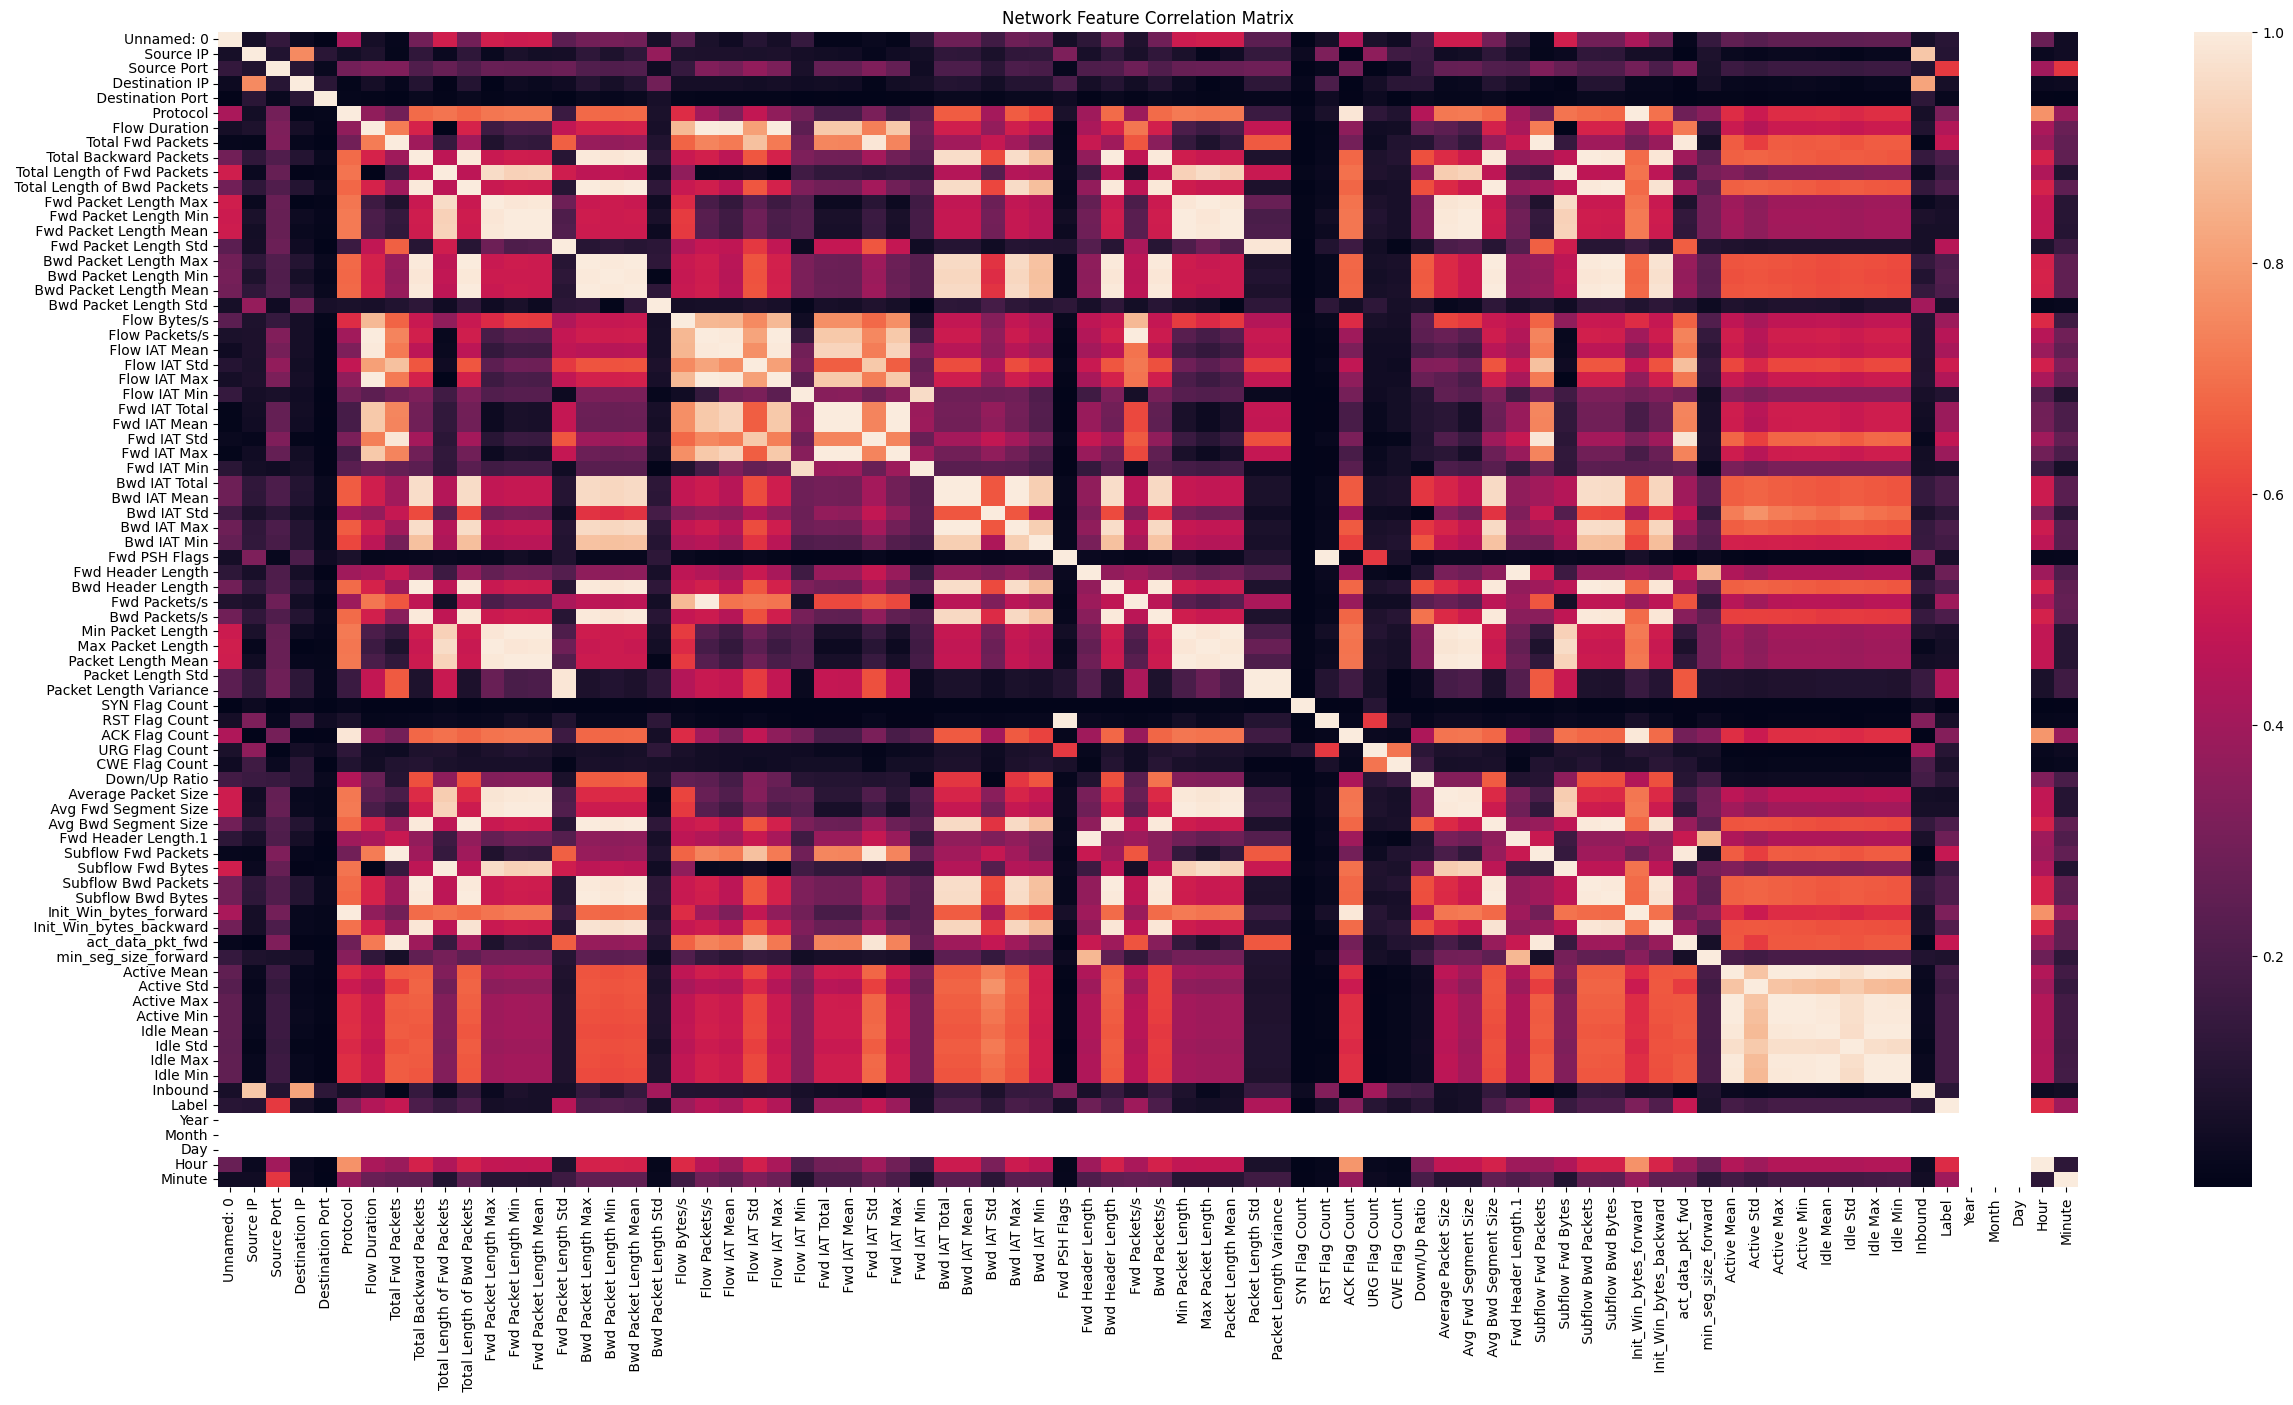

In [ ]:
#Compute the correlation matrix
numeric_data = data.select_dtypes(include='number')
corr_mx = numeric_data.corr(method='spearman')
#Plot the heatmap
plt.figure(figsize = (30,15))
sns.heatmap(abs(corr_mx), annot=False)
plt.title('Network Feature Correlation Matrix')
plt.show



In [ ]:
#List to store the variable pairs above threshold
variable_pairs_above_threshold = []
variables_drop = []

#Iterate through the upper triangular part of the correlation matrix
for i in range(len(corr_mx.columns)):
  for j in range(i+1, len(corr_mx.columns)):
    #Threshold = 0.9
    if corr_mx.iloc[i,j] > 0.9:
      #Store the variable pairs
      variable_pairs_above_threshold.append((corr_mx.columns[i], corr_mx.columns[j]))
      if corr_mx.columns[i] not in variables_drop and corr_mx.columns[j] not in variables_drop:
        variables_drop.append(corr_mx.columns[j])

#Print the variable pairs
print(len(variables_drop))
for pair in variables_drop:
  print(pair)

43
 Flow IAT Mean
 Flow IAT Max
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Max
 Fwd IAT Std
Subflow Fwd Packets
 act_data_pkt_fwd
 Total Length of Bwd Packets
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Max
 Bwd Header Length
 Bwd Packets/s
 Avg Bwd Segment Size
 Subflow Bwd Packets
 Subflow Bwd Bytes
 Init_Win_bytes_backward
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Min Packet Length
 Max Packet Length
 Packet Length Mean
 Average Packet Size
 Avg Fwd Segment Size
 Subflow Fwd Bytes
 Packet Length Std
 Packet Length Variance
Fwd Packets/s
 Fwd IAT Min
 RST Flag Count
 Fwd Header Length.1
Init_Win_bytes_forward
 Active Max
 Active Min
Idle Mean
 Idle Std
 Idle Max
 Idle Min


In [ ]:
#Time stamp is dropped since it is already extracted to different columns
data = data.drop('SimillarHTTP', axis=1)
data.head()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Year,Month,Day,Hour,Minute
0,13605,2886729733,870,3232248324,2908,17,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,0.0,0.0,0.0,0.0,4.220000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,211.0,211.0,211.0,0.0,0.0,0,0,0,0,0,0.0,316.5,211.0,0.0,-2,2,422,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2018,11,3,10,9
1,62631,2886729733,871,3232248324,53796,17,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,0.0,0.0,0.0,0.0,1.104167e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,4.166667e+04,0.0,265.0,265.0,265.0,0.0,0.0,0,0,0,0,0,0.0,397.5,265.0,0.0,-2,2,530,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2018,11,3,10,9
2,143869,2886729733,648,3232248324,40660,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2018,11,3,10,9
3,16171,2886729733,872,3232248324,54308,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2018,11,3,10,9
4,80845,2886729733,873,3232248324,40653,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2018,11,3,10,9


In [ ]:
#Dropping the target variable label from the dataset and storing it into seperate array
tgt = data['Label']
data = data.drop(['Label'], axis = 1)


In [ ]:
#Dropping the variables from the list variables_drop which was found out previously from correlation matrix
data = data.drop(variables_drop, axis =1)
#data normalisation
normalised_data = (data - data.mean())/data.std()


In [ ]:
data.describe()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Std,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Min,Bwd IAT Std,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,SYN Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,min_seg_size_forward,Active Mean,Active Std,Inbound,Year,Month,Day,Hour,Minute
count,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1391681.0,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1.391694e+06,1391694.0,1391694.0,1391694.0,1.391694e+06,1.391694e+06
mean,1.295754e+05,2.888158e+09,2.483984e+04,3.219764e+09,3.272484e+04,1.470650e+01,3.491457e+06,3.026174e+00,4.664423e-01,6.945334e+02,3.533980e+00,6.529312e-01,inf,inf,5.716534e+05,5.885657e+02,4.384575e+05,3.625581e-01,1.329315e-03,-6.226130e+07,6.538794e-05,2.044070e-01,3.881600e-03,1.953016e-03,5.720223e-02,-3.022158e+07,1.105491e+04,1.568401e+04,9.919285e-01,2018.0,11.0,3.0,1.028325e+01,2.125068e+01
std,1.161638e+05,6.224228e+07,2.419404e+04,1.821877e+08,1.901081e+04,4.470170e+00,1.273657e+07,2.914182e+01,2.707726e+01,9.522652e+02,1.580121e+01,2.077584e+01,NaN,NaN,2.086839e+06,1.200249e+05,2.569165e+06,3.492193e+00,3.643555e-02,3.807255e+08,8.086019e-03,4.032678e-01,6.218148e-02,4.414978e-02,2.492594e-01,1.766458e+08,1.543543e+05,1.805851e+05,8.947802e-02,0.0,0.0,0.0,4.597453e-01,1.911075e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.456459e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.825788e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,2018.0,11.0,3.0,9.000000e+00,0.000000e+00
25%,4.772200e+04,2.886730e+09,7.640000e+02,3.232248e+09,1.629100e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,4.240000e+02,0.000000e+00,0.000000e+00,6000000.0,4.081633e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2018.0,11.0,3.0,1.000000e+01,1.000000e+00
50%,9.523800e+04,2.886730e+09,2.020900e+04,3.232248e+09,3.273800e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,4.580000e+02,0.000000e+00,0.000000e+00,458000000.0,2.000000e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2018.0,11.0,3.0,1.000000e+01,9.000000e+00
75%,1.725628e+05,2.886730e+09,4.815100e+04,3.232248e+09,4.923500e+04,1.700000e+01,5.000000e+01,2.000000e+00,0.000000e+00,8.340000e+02,0.000000e+00,0.000000e+00,494000000.0,2.000000e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2018.0,11.0,3.0,1.100000e+01,3.600000e+01
max,6.108790e+05,3.715790e+09,6.553200e+04,4.294967e+09,6.553500e+04,1.700000e+01,1.199975e+08,2.527400e+04,3.170000e+04,1.509340e+05,1.236730e+03,1.135799e+03,inf,inf,6.681408e+07,4.915212e+07,4.499012e+07,2.060000e+02,1.000000e+00,4.290160e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.480000e+03,8.140801e+07,3.610598e+07,1.000000e+00,2018.0,11.0,3.0,1.100000e+01,5.900000e+01


In [ ]:
#Displaying the normalised data information
normalised_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391694 entries, 0 to 199999
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1391694 non-null  float64
 1    Source IP                   1391694 non-null  float64
 2    Source Port                 1391694 non-null  float64
 3    Destination IP              1391694 non-null  float64
 4    Destination Port            1391694 non-null  float64
 5    Protocol                    1391694 non-null  float64
 6    Flow Duration               1391694 non-null  float64
 7    Total Fwd Packets           1391694 non-null  float64
 8    Total Backward Packets      1391694 non-null  float64
 9   Total Length of Fwd Packets  1391694 non-null  float64
 10   Fwd Packet Length Std       1391694 non-null  float64
 11   Bwd Packet Length Std       1391694 non-null  float64
 12  Flow Bytes/s                 0 non-null        f

In [ ]:
#displaying column wise first 5 rows of normalised data
normalised_data.head()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Std,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Min,Bwd IAT Std,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,SYN Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,min_seg_size_forward,Active Mean,Active Std,Inbound,Year,Month,Day,Hour,Minute
0,-0.998335,-0.02295,-0.990733,0.068525,-1.568415,0.513067,-0.274128,-0.035213,-0.017226,-0.286195,-0.223653,-0.031427,NaN,NaN,-0.273933,-0.004895,-0.170661,-0.10382,-0.036484,0.163533,-0.008087,-0.506877,-0.062424,-0.044236,-0.229489,0.171086,-0.07162,-0.086851,0.090206,NaN,NaN,NaN,-0.616092,-0.641036
1,-0.576293,-0.02295,-0.990692,0.068525,1.108378,0.513067,-0.274125,-0.035213,-0.017226,-0.172781,-0.223653,-0.031427,NaN,NaN,-0.273933,-0.004504,-0.170661,-0.10382,-0.036484,0.163533,-0.008087,-0.506877,-0.062424,-0.044236,-0.229489,0.171086,-0.07162,-0.086851,0.090206,NaN,NaN,NaN,-0.616092,-0.641036
2,0.123047,-0.02295,-0.999909,0.068525,0.417403,0.513067,-0.274128,-0.035213,-0.017226,-0.248390,-0.223653,-0.031427,NaN,NaN,-0.273933,-0.004895,-0.170661,-0.10382,-0.036484,0.163533,-0.008087,-0.506877,-0.062424,-0.044236,-0.229489,0.171086,-0.07162,-0.086851,0.090206,NaN,NaN,NaN,-0.616092,-0.641036
3,-0.976246,-0.02295,-0.990650,0.068525,1.135310,0.513067,-0.274128,-0.035213,-0.017226,-0.248390,-0.223653,-0.031427,NaN,NaN,-0.273933,-0.004895,-0.170661,-0.10382,-0.036484,0.163533,-0.008087,-0.506877,-0.062424,-0.044236,-0.229489,0.171086,-0.07162,-0.086851,0.090206,NaN,NaN,NaN,-0.616092,-0.641036
4,-0.419497,-0.02295,-0.990609,0.068525,0.417034,0.513067,-0.274128,-0.035213,-0.017226,-0.248390,-0.223653,-0.031427,NaN,NaN,-0.273933,-0.004895,-0.170661,-0.10382,-0.036484,0.163533,-0.008087,-0.506877,-0.062424,-0.044236,-0.229489,0.171086,-0.07162,-0.086851,0.090206,NaN,NaN,NaN,-0.616092,-0.641036


In [ ]:
#Time stamp is dropped as it doesn't contain variation in the information similarly flow bytes and flow packets also
normalised_data = normalised_data.drop(['Year','Month', 'Day','Flow Bytes/s',' Flow Packets/s'], axis =1)


In [ ]:
#data.to_csv("After_correlation.csv", index = False)

In [ ]:
#exporting the preprocessed data into csv file for applying the different ML algorithms
normalised_data.to_csv("normalised_data.csv",index = False)

In [ ]:
#Exporting the target data also into a csv file
tgt.to_csv("target.csv",index = False)

In [ ]:
#Performing XGBoost algorithm on preprocessed data and finding the accuracy on the test data
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#folder_path_data = '/content/drive/MyDrive/03-11/normalised_data.csv'
#folder_path_tgt = '/content/drive/MyDrive/03-11/target.csv'
data = pd.read_csv('/content/drive/MyDrive/03-11/normalised_data.csv')
tgt = pd.read_csv('/content/drive/MyDrive/03-11/target.csv')

from sklearn.model_selection import train_test_split #For splitting training and testing data
#Data is split into 75-25% for training and testing
data_train, data_valid , y_train, y_valid  = train_test_split(data, tgt, train_size = 0.75)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Installation of Xgboost library
!pip install xgboost


In [ ]:
#predicting the output of the test data using the XGBoost trained model
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(data_train, y_train)
y_pred = xgboost_model.predict(data_valid)

In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score#To check how accuarate is our predicted data with true data
from sklearn.metrics import make_scorer, f1_score, precision_score
Accuracy_xgb = metrics.accuracy_score(y_valid, y_pred)*100
recall_xgb = metrics.recall_score(y_valid, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)
f1_Score_xgb = f1_score(y_valid, y_pred, average='macro')


print('----------------------------------')
print('Performance Results using XGBoost')
print('----------------------------------\n')
print('Accuracy is:', metrics.accuracy_score(y_valid, y_pred)*100)
print('Recall is :', metrics.recall_score(y_valid, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None))

print('Confusion matrix :\n',metrics.confusion_matrix(y_valid, y_pred, labels=None, sample_weight=None) )
print("Classification report:\n",classification_report(y_valid, y_pred))
print('F1 Score : ', f1_score(y_valid, y_pred, average='macro'))




----------------------------------
Performance Results using XGBoost
----------------------------------

Accuracy is: 97.21979512767156
Recall is : 0.9721979512767156
Confusion matrix :
 [[ 2760     1     0     0     0     0     0     0]
 [    0 90491     0     0  9416     0     1     0]
 [    0     0  2500     0     0     0     0     0]
 [    0     0     0 53522     0     0     0     0]
 [    0   255     0     0 46574     0     0     0]
 [    0     0     0     0     0 70252     0     0]
 [    0     0     0     0     0     0 71669     0]
 [    0     0     0     0     0     0     0   483]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2761
           1       1.00      0.91      0.95     99908
           2       1.00      1.00      1.00      2500
           3       1.00      1.00      1.00     53522
           4       0.83      0.99      0.91     46829
           5       1.00      1.00      1.00     70252
 

In [ ]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn import metrics
model_SGD = SGDClassifier(loss="log", penalty="elasticnet", max_iter=200)#Hyper parameter is taken as logistic regression and penalty as elasticnet and max_iteration as 200
model_SGD.fit(data_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log', max_iter=200, penalty='elasticnet')

In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output
y_pred_SGD = model_SGD.predict(data_valid)
accuracy_SGD = metrics.accuracy_score(y_valid, y_pred_SGD) * 100
recall_SGD = metrics.recall_score(y_valid, y_pred_SGD, pos_label=1, average='weighted')


In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output
#Printing the performance results of SGD
from sklearn.metrics import f1_score
print('-----------------------------------------------------')
print('Performance Results using Stochastic Gradient Descent')
print('-----------------------------------------------------\n')
print("Accuracy is ", accuracy_SGD)
print('Recall : ', metrics.recall_score(y_valid, y_pred_SGD, pos_label=1, average='weighted'))
print('Confusion Matrix : \n', metrics.confusion_matrix(y_valid, y_pred_SGD))
print('Classification Report : \n', metrics.classification_report(y_valid, y_pred_SGD, digits=3))
print('F1 Score : ', f1_score(y_valid, y_pred_SGD, average='macro'))
f1_Score_SGD = f1_score(y_valid, y_pred_SGD, average='macro')

-----------------------------------------------------
Performance Results using Stochastic Gradient Descent
-----------------------------------------------------

Accuracy is  90.0268449431485
Recall :  0.900268449431485
Confusion Matrix : 
 [[ 2676     3     0    15    37    15    13     2]
 [    2 85056     0    51 14799     0     0     0]
 [    4     3  2348   143     0     2     0     0]
 [   13  2412    88 50300     0    15   694     0]
 [   28 15551     7   177 31066     0     0     0]
 [    1     0     0     0     0 70235     8     8]
 [    8     6     0   213     0    10 71407    25]
 [   13     2     0     0     0    24   307   137]]
Classification Report : 
               precision    recall  f1-score   support

           0      0.975     0.969     0.972      2761
           1      0.826     0.851     0.838     99908
           2      0.961     0.939     0.950      2500
           3      0.988     0.940     0.963     53522
           4      0.677     0.663     0.670     4682

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=8)#Hyper paramter is no.of neighbors which is 8
model_KNN.fit(data_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output using KNN model
y_pred_KNN = model_KNN.predict(data_valid)
accuracy_KNN = metrics.accuracy_score(y_valid, y_pred_KNN)*100
recall_KNN = metrics.recall_score(y_valid, y_pred_KNN, pos_label=1, average='weighted')
f1_Score_KNN = f1_score(y_valid, y_pred_KNN, average='macro')
print('Accuracy : ', accuracy_KNN)
print('F1 score:', f1_Score_KNN)

Accuracy :  95.73642519630724
F1 score: 0.9608441545129356


In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output
#Printing the performance results of KNN
print('------------------------------')
print('Performance Results using KNN')
print('------------------------------\n')
print('Accuracy is : ', accuracy_KNN)
print('Recall is : ', metrics.recall_score(y_valid, y_pred_KNN, pos_label=1, average='weighted'))
print('Confusion Matrix : \n', metrics.confusion_matrix(y_valid, y_pred_KNN))
print('Classification Report : \n', metrics.classification_report(y_valid, y_pred_KNN, digits=3))
print('F1 Score : ', f1_score(y_valid, y_pred_KNN, average='macro'))

------------------------------
Performance Results using KNN
------------------------------

Accuracy is :  95.73642519630724
Recall is :  0.9573642519630724
Confusion Matrix : 
 [[ 2755     0     0     1     1     3     1     0]
 [    0 88379     0     6 11522     1     0     0]
 [    0     0  2477    20     1     0     2     0]
 [    1     2    49 53440     3     0    25     2]
 [    6  3089     1     0 43732     0     0     1]
 [    0     0     0     0     0 70235     0    17]
 [    3     0     0    25     1     1 71633     6]
 [    1     0     0     1     0    11    31   439]]
Classification Report : 
               precision    recall  f1-score   support

           0      0.996     0.998     0.997      2761
           1      0.966     0.885     0.924     99908
           2      0.980     0.991     0.985      2500
           3      0.999     0.998     0.999     53522
           4      0.791     0.934     0.857     46829
           5      1.000     1.000     1.000     70252
       

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(data_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output
y_pred_NB = model_NB.predict(data_valid)
accuracy_NB = metrics.accuracy_score(y_valid, y_pred_NB)*100
recall_NB = metrics.recall_score(y_valid, y_pred_NB, pos_label=1, average='weighted')
f1_Score_NB = f1_score(y_valid, y_pred_NB, average='macro')
print(f1_Score_NB)


0.7826850352620685


In [ ]:
#The calculation of accuracy, F1 score, recall by comparing the predicted ouput with the target output
#Printing the performance results of Naive-bayes
print('-------------------------------------')
print('Performance Results using Naive-bayes')
print('-------------------------------------\n')
print('Accuracy is :', accuracy_NB)
print('Recall is : ', metrics.recall_score(y_valid, y_pred_NB, pos_label=1, average='weighted'))
print('Confusion Matrix : \n', metrics.confusion_matrix(y_valid, y_pred_NB))
print('Classification Report : \n', metrics.classification_report(y_valid, y_pred_NB, digits=3))
print('F1 Score : ', f1_score(y_valid, y_pred_NB, average='macro'))

-------------------------------------
Performance Results using Naive-bayes
-------------------------------------

Accuracy is : 85.7405640312252
Recall is :  0.8574056403122521
Confusion Matrix : 
 [[ 2588     0     0     0     0     0     0   173]
 [   58 99839     0     2     0     0     9     0]
 [   33     5  2433    27     0     0     2     0]
 [  191     1     0 53330     0     0     0     0]
 [  215 46496     0     0     0     0   118     0]
 [   36     0     0     0     0 70201     2    13]
 [   86     0     0  1914     1     4 69562   102]
 [   13     0     0     0     0    12    99   359]]
Classification Report : 
               precision    recall  f1-score   support

           0      0.804     0.937     0.865      2761
           1      0.682     0.999     0.811     99908
           2      1.000     0.973     0.986      2500
           3      0.965     0.996     0.980     53522
           4      0.000     0.000     0.000     46829
           5      1.000     0.999     1.0

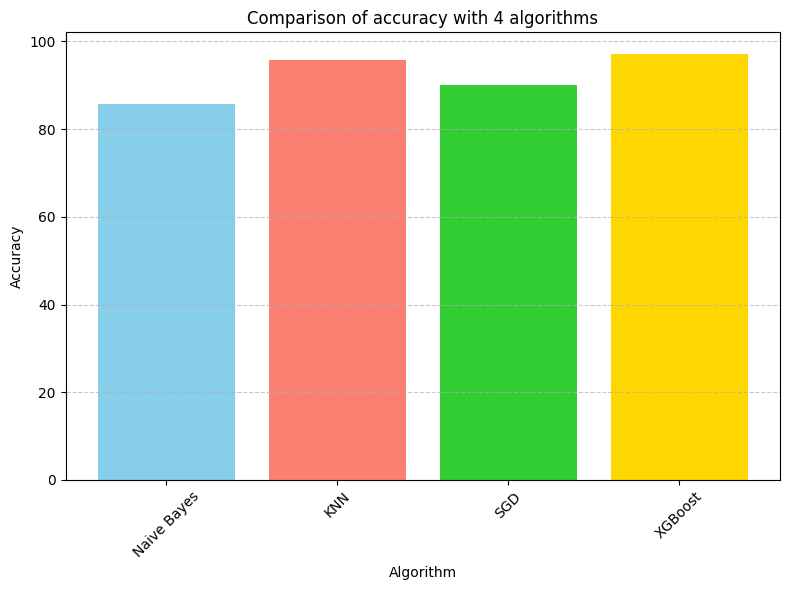

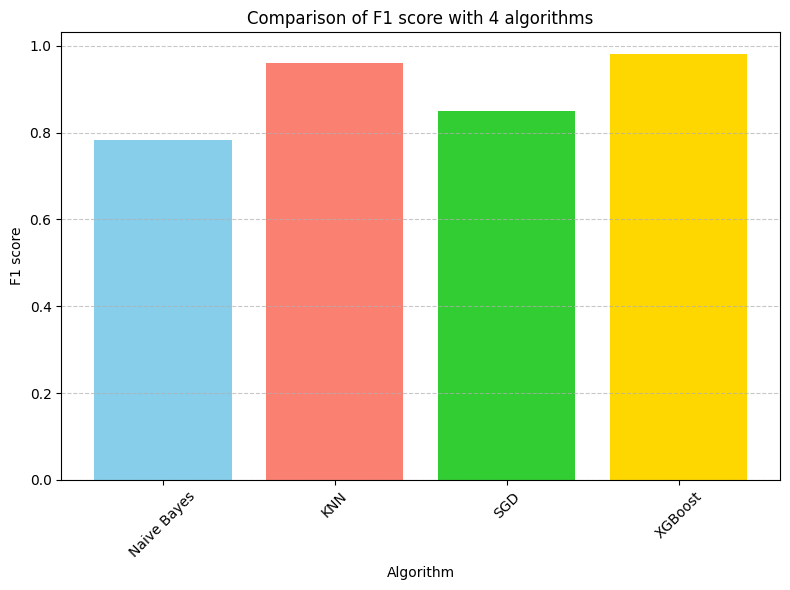

In [ ]:
import matplotlib.pyplot as plt
Algorithm = ['Naive Bayes', 'KNN', 'SGD', 'XGBoost']
acc_val = [accuracy_NB, accuracy_KNN, accuracy_SGD, Accuracy_xgb]
f1_val = [f1_Score_NB, f1_Score_KNN, f1_Score_SGD, f1_Score_xgb]
colors = ['skyblue', 'salmon', 'limegreen', 'gold']

plt.figure(figsize= (8,6))
plt.bar(Algorithm, acc_val, color = colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of accuracy with 4 algorithms')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle ='--', alpha = 0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize= (8,6))
plt.bar(Algorithm, f1_val, color = colors)
plt.xlabel('Algorithm')
plt.ylabel('F1 score')
plt.title('Comparison of F1 score with 4 algorithms')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle ='--', alpha = 0.7)
plt.tight_layout()
plt.show()